In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("nobel_prize_data.csv")

In [3]:
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [4]:
# Install plotly
!pip install --upgrade plotly

In [5]:
# shape of the dataframe
df.shape

(962, 16)

In [6]:
# column names
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

<Axes: xlabel='sex', ylabel='count'>

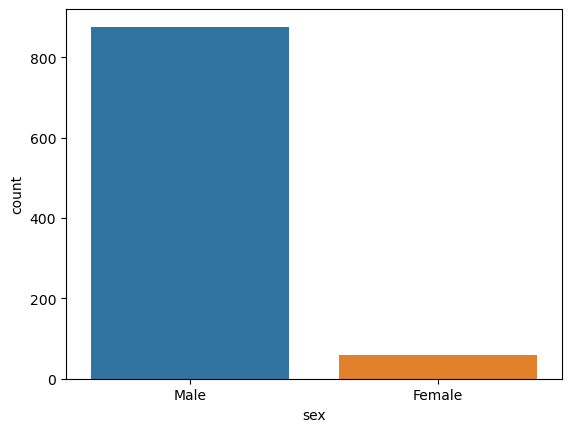

In [7]:
# Compare awards based on gender
sns.countplot(df, x="sex")

In [8]:
# The year Noble Prize was first awarded
df.year.min()

1901

In [9]:
df.year.max()

2020

In [10]:
# confirm birth-date data type
df.birth_date.dtype

dtype('O')

In [11]:
# check duplicates
df.duplicated().values.any()

False

In [12]:
# Check for NaN
df.isnull().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [13]:
# filter on the NaN values
col_subset = ["year", "category", "laureate_type", "birth_date", "full_name", "organization_name"]
df.loc[df.birth_date.isna()][col_subset]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

In [14]:
df.loc[df.organization_name.isna()][col_subset]

year    category laureate_type  birth_date  \
1    1901  Literature    Individual  1839-03-16   
3    1901       Peace    Individual  1822-05-20   
4    1901       Peace    Individual  1828-05-08   
7    1902  Literature    Individual  1817-11-30   
9    1902       Peace    Individual  1843-05-21   
..    ...         ...           ...         ...   
932  2018       Peace    Individual  1993-07-02   
942  2019  Literature    Individual  1942-12-06   
946  2019       Peace    Individual  1976-08-15   
954  2020  Literature    Individual  1943-04-22   
958  2020       Peace  Organization         NaN   

                              full_name organization_name  
1                       Sully Prudhomme               NaN  
3                        Frédéric Passy               NaN  
4                     Jean Henry Dunant               NaN  
7    Christian Matthias Theodor Mommsen               NaN  
9                  Charles Albert Gobat               NaN  
..                                  ...               ...  
932                         Nadia Murad               NaN  
942                        Peter Handke               NaN  
946                      Abiy Ahmed Ali               NaN  
954                        Louise Glück               NaN  
958          World Food Programme (WFP)               NaN  

[255 rows x 6 columns]

In [15]:
# Convert birth-date column to datetime
df["birth_date"] = pd.to_datetime(df.birth_date)

In [16]:
df["birth_date"]

0     1852-08-30
1     1839-03-16
2     1854-03-15
3     1822-05-20
4     1828-05-08
         ...    
957   1949-07-02
958          NaT
959   1965-06-16
960   1952-03-24
961   1931-08-08
Name: birth_date, Length: 962, dtype: datetime64[ns]

In [17]:
separated_values = df.prize_share.str.split("/", expand=True)
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])
df["share_pct"] = numerator / denominator

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [19]:
# Compare percentage of Male vs. Female winners
gender = df.sex.value_counts()
fig = px.pie(labels=gender.index,
             values=gender.values,
             title="Percentage of Male vs. Female Winners",
             names=gender.index,
             hole=0.2
            )
fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")

fig.show()

In [20]:
# First three women to win it
df[df.sex == "Female"].sort_values("year", ascending=True)[:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

In [21]:
# Look for repeat winners
is_winner = df.duplicated(subset=["full_name"], keep=False)
multiple_winners = df[is_winner]

In [22]:
multiple_winners.full_name.nunique()

6

In [23]:
col_subset = ["year", "category", "laureate_type", "full_name", "sex"]


In [24]:
multiple_winners[col_subset]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name     sex  
18                         Marie Curie, née Sklodowska  Female  
62                         Marie Curie, née Sklodowska  Female  
89   Comité international de la Croix Rouge (Intern...     NaN  
215  Comité international de la Croix Rouge (Intern...     NaN  
278                                 Linus Carl Pauling    Male  
283  Office of the United Nations High Commissioner...     NaN  
297                                       John Bardeen    Male  
306                                   Frederick Sanger    Male  
340                                 Linus Carl Pauling    Male  
348  Comité international de la Croix Rouge (Intern...     NaN  
424                                       John Bardeen    Male  
505                                   Frederick Sanger    Male  
523  Office of the United Nations High Commissioner...     NaN

In [25]:
# Number of prizes per category
prizes_per_cat = df.category.value_counts()
bar = px.bar(
    x=prizes_per_cat.index,
    y=prizes_per_cat.values,
    color=prizes_per_cat.values,
    color_continuous_scale="Aggrnyl",
    title="Number of Prizes Awarded per Category"
)

bar.update_layout(xaxis_title="Nobel Prize Category",
                  coloraxis_showscale=False,
                  yaxis_title="Number of Prizes"
                 )
bar.show()

In [26]:
df[df.category == "Economics"].sort_values("year")[:5]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
411  1971  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
419  1972  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   
411  "for his empirically founded interpretation of...         1/1   
419  "for their pioneering contributions to general...         1/2   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   
411    Individual      Simon Kuznets 1901-04-30      Pinsk   
419    Individual      John R. Hicks 1904-04-08    Warwick   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   
411  Russian Empire (Belarus)                   Belarus  Male   
419            United Kingdom            United Kingdom  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   
411                           Harvard University     Cambridge, MA   
419                         University of Oxford            Oxford   

         organization_country  ISO  share_pct  
393               Netherlands  NLD        0.5  
394                    Norway  NOR        0.5  
402  United States of America  USA        1.0  
411  United States of America  BLR        1.0  
419            United Kingdom  GBR        0.5

In [27]:
# Compare number of women and men per category
cat_gender = df.groupby(["category", "sex"], as_index=False).agg({"prize": pd.Series.count})

In [28]:
cat_gender.sort_values("prize", ascending=False, inplace=True)

In [29]:
cat_gender

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

<Axes: xlabel='category', ylabel='prize'>

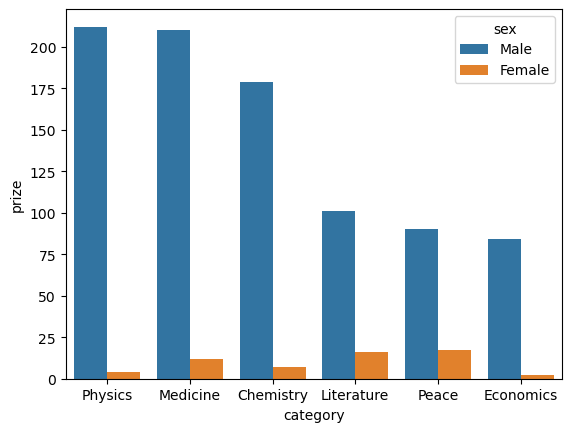

In [30]:
sns.barplot(cat_gender, x="category", y="prize", hue="sex")

In [31]:
bar = px.bar(x=cat_gender.category,
             y=cat_gender.prize,
             color=cat_gender.sex,
             title="Number of Prizes Awarded per Category split by Gender"
            )
bar.update_layout(xaxis_title="Nobel Prize Category",
                 yaxis_title="Number of Prizes")
bar.show()

In [32]:
# Prizes per year
prizes_per_year = df.groupby("year").count().prize

In [33]:
prizes_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [34]:
# 5 year moving average
moving_average = prizes_per_year.rolling(window=5).mean()

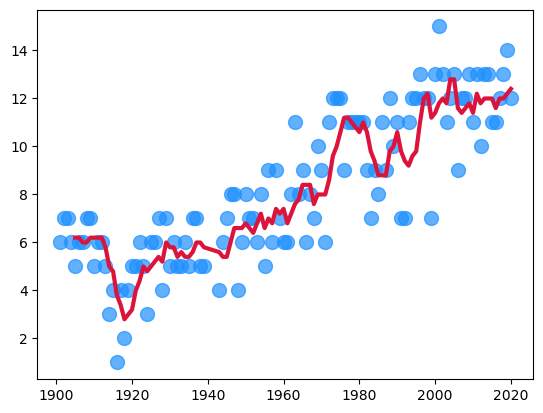

In [35]:
# Visualization
plt.scatter(x=prizes_per_year.index,
            y=prizes_per_year.values,
            c="dodgerblue",
            alpha=0.7,
            s=100
           )
plt.plot(prizes_per_year.index,
         moving_average.values,
         c="crimson",
         lw=3
)
plt.show()

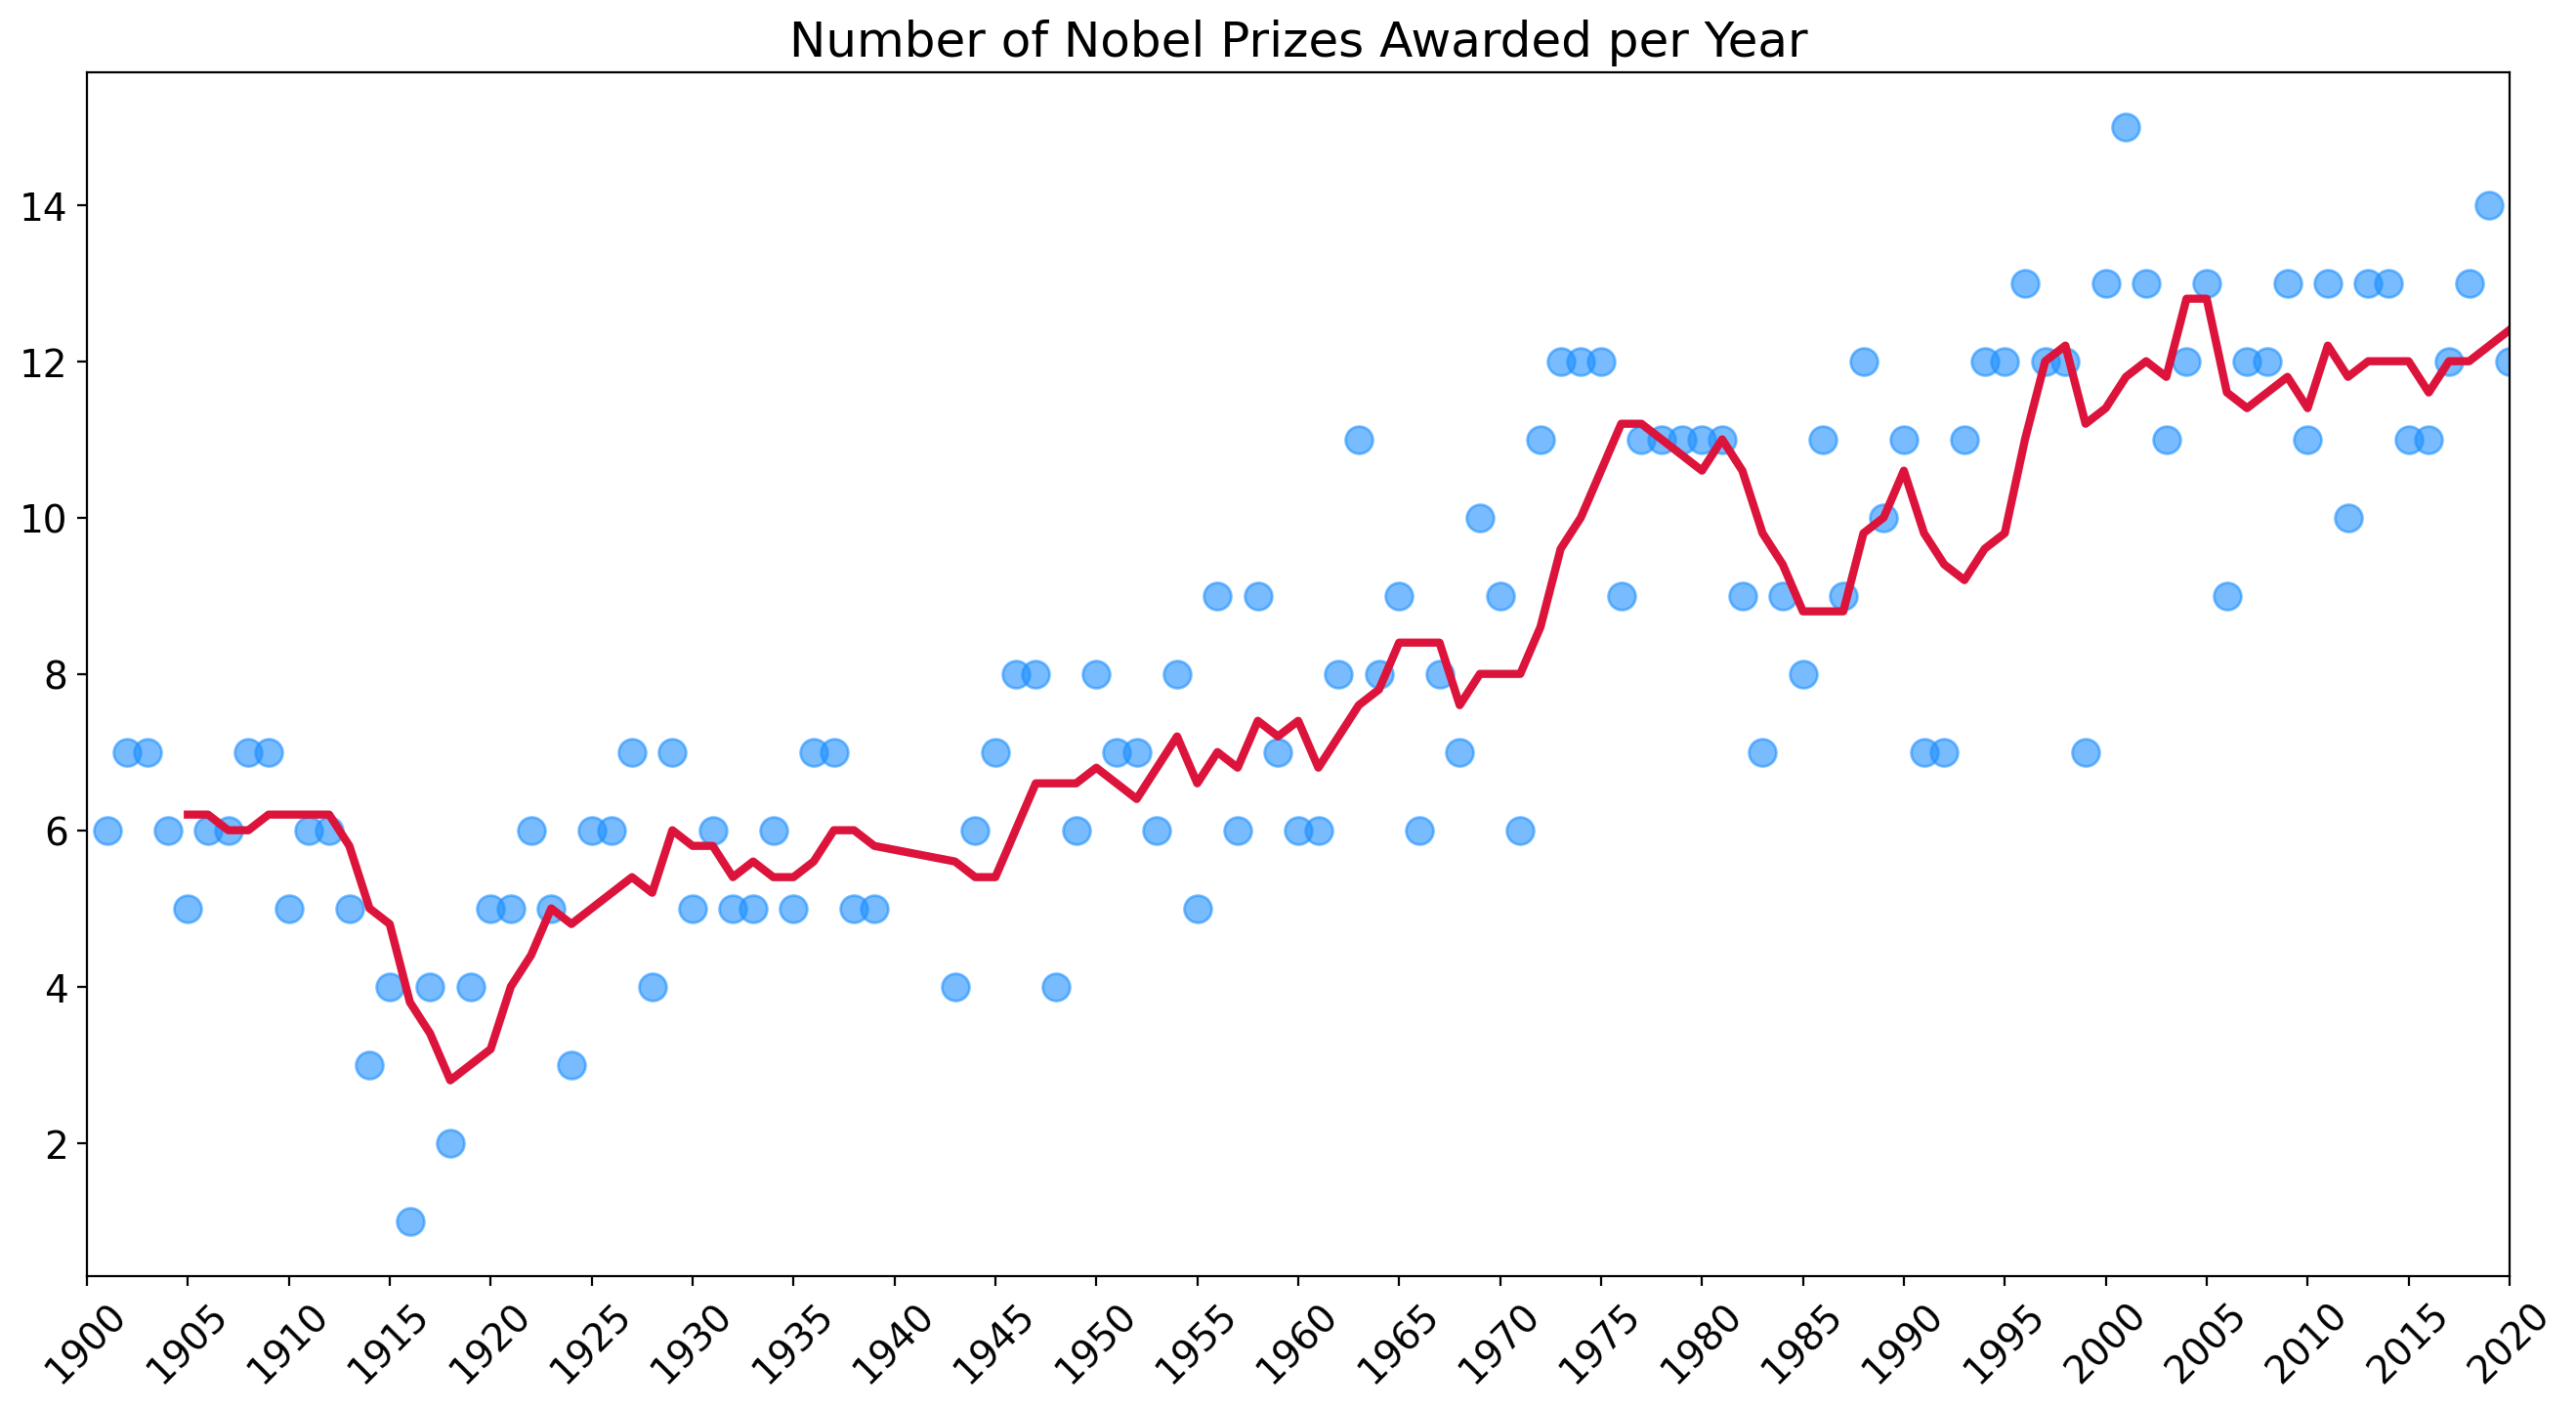

In [36]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(x=prizes_per_year.index,
           y=prizes_per_year.values,
           c="dodgerblue",
           alpha=0.6,
           s=100
)

ax.plot(prizes_per_year.index,
        moving_average.values,
        c="crimson",
        lw=3
       )
plt.show()

In [37]:
# Prize share of laureates over time
yearly_avg_share = df.groupby("year").agg({"share_pct": pd.Series.mean})
moving_share_avg = yearly_avg_share.rolling(window=5).mean()

In [38]:
moving_share_avg

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905   0.819048
...         ...
2016   0.522797
2017   0.502797
2018   0.502797
2019   0.496204
2020   0.487113

[117 rows x 1 columns]

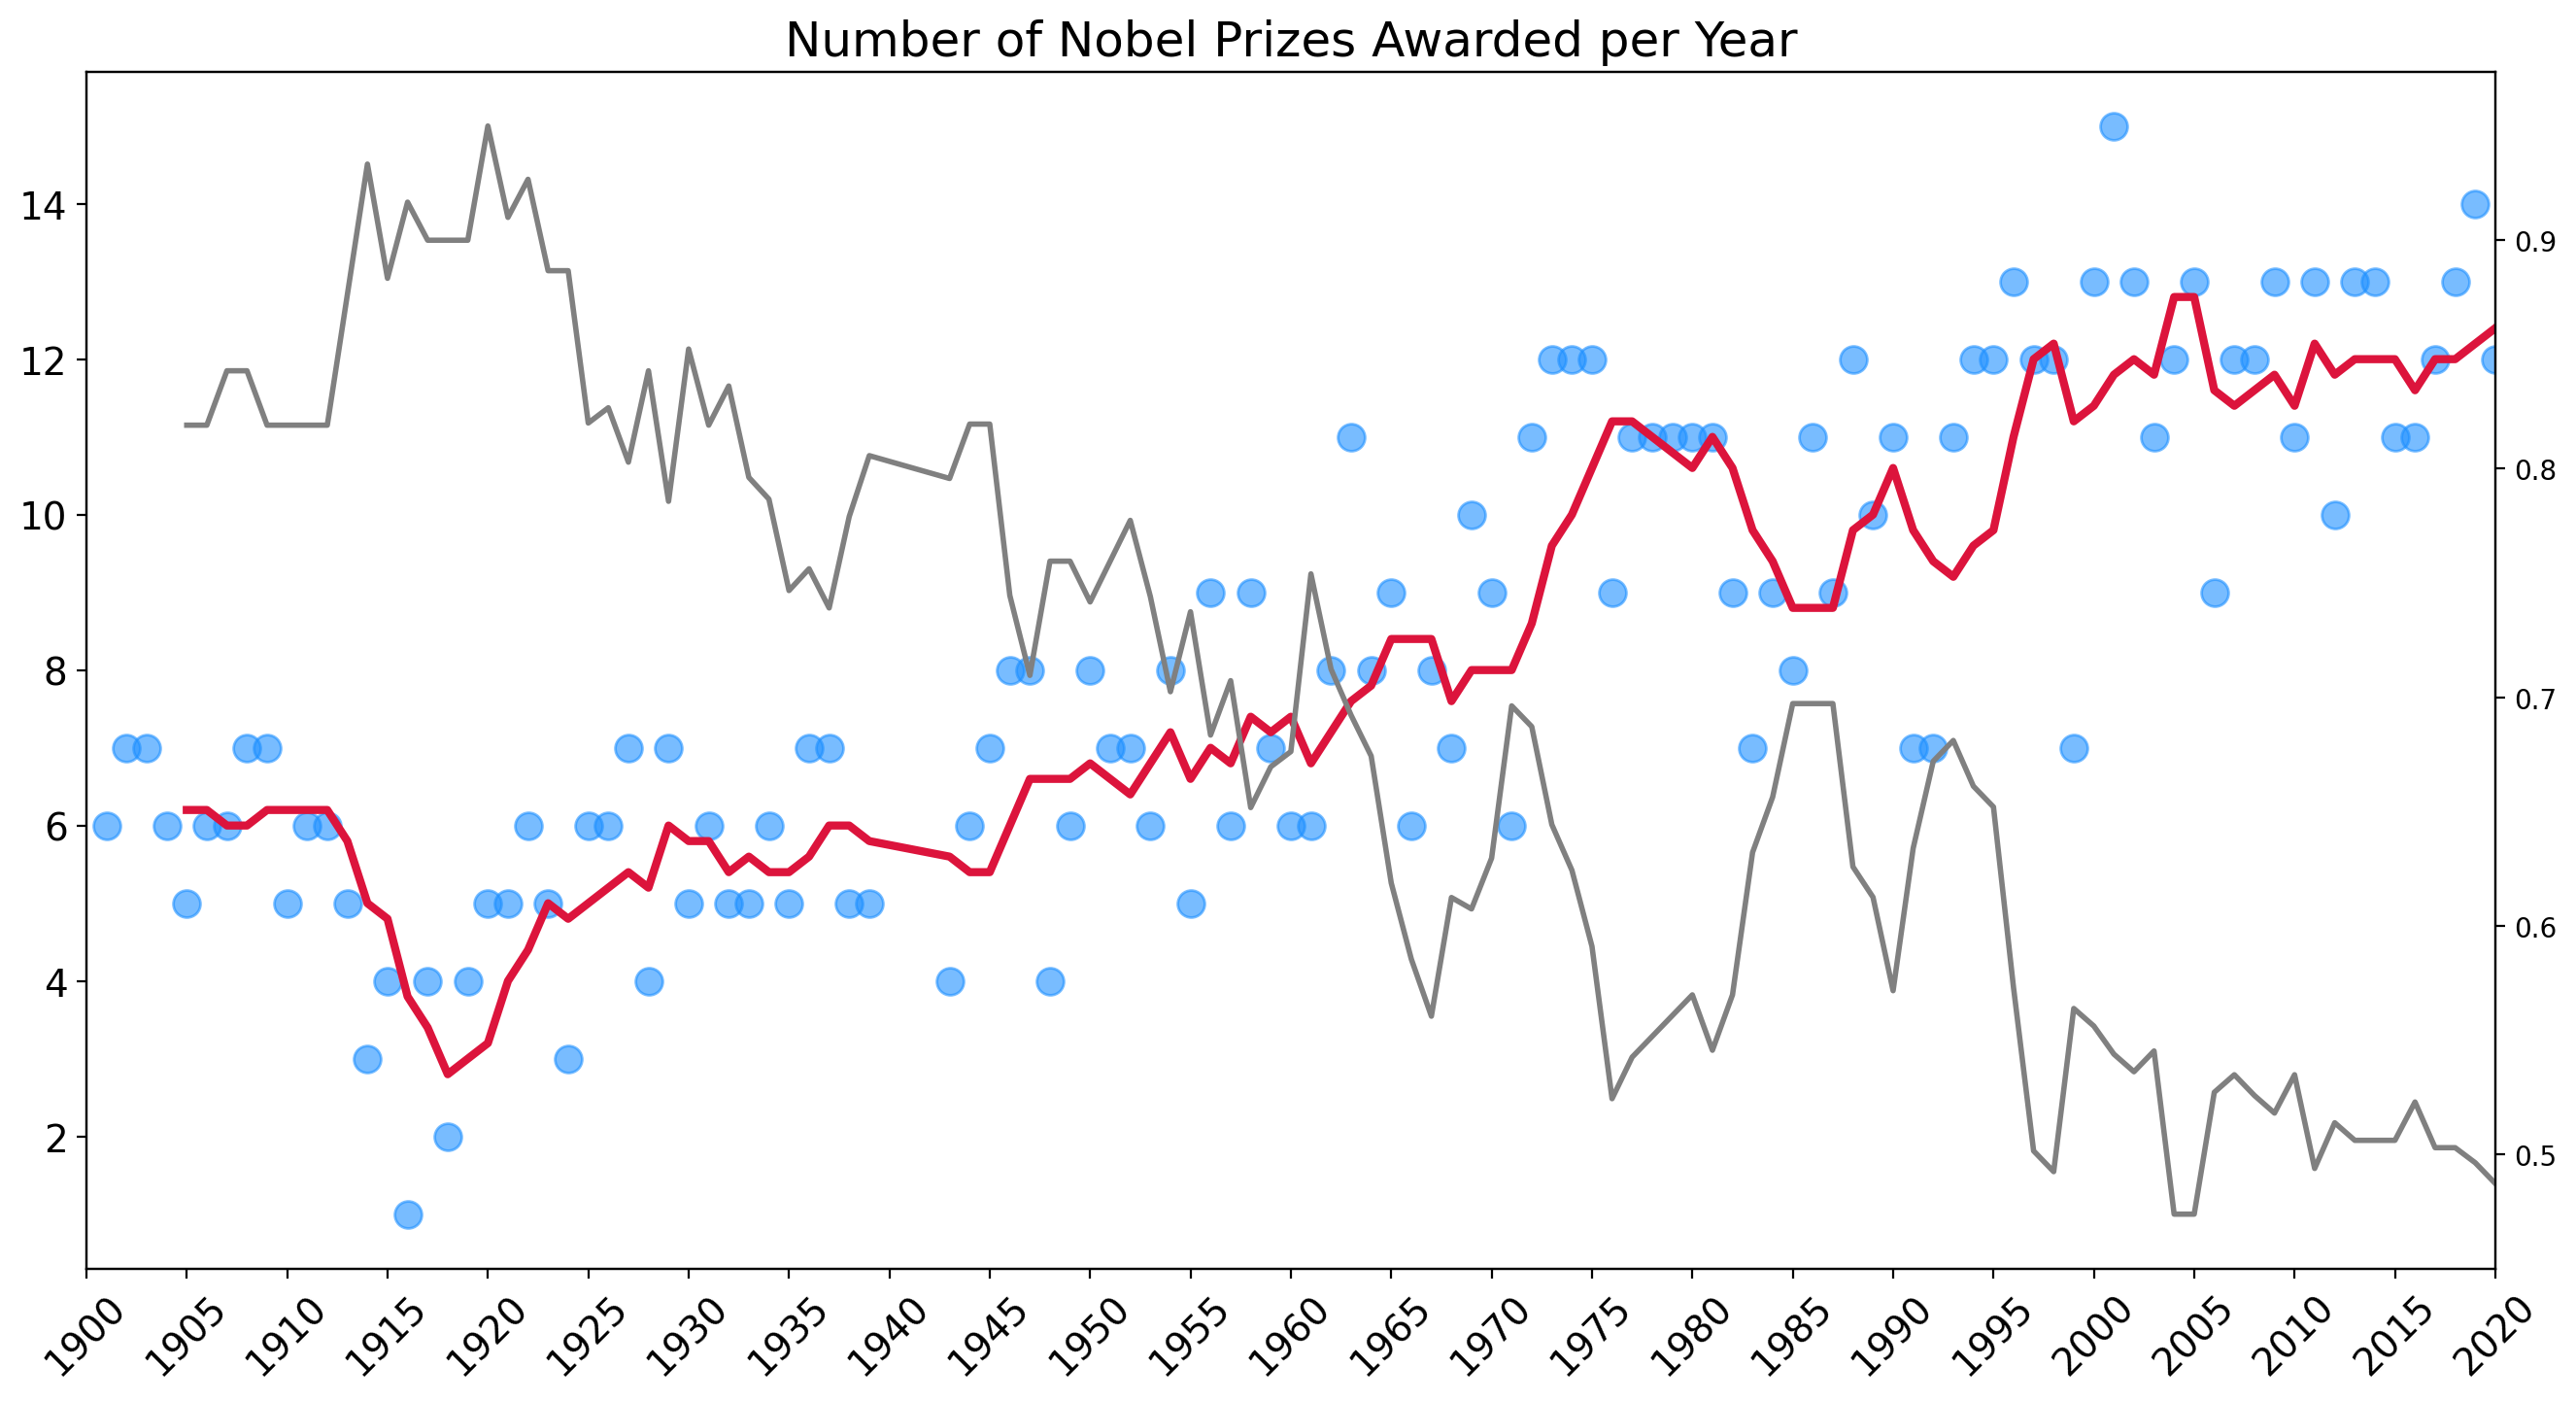

In [39]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax = plt.gca()
ax2 = ax.twinx()
ax.set_xlim(1900, 2020)

ax.scatter(x=prizes_per_year.index,
           y=prizes_per_year.values,
           c="dodgerblue",
           alpha=0.6,
           s=100
)

ax.plot(prizes_per_year.index,
        moving_average.values,
        c="crimson",
        lw=3
       )


# Adding prize share plot on second axis
ax2.plot(prizes_per_year.index,
        moving_share_avg.values,
        c="grey",
        lw=2)
plt.show()

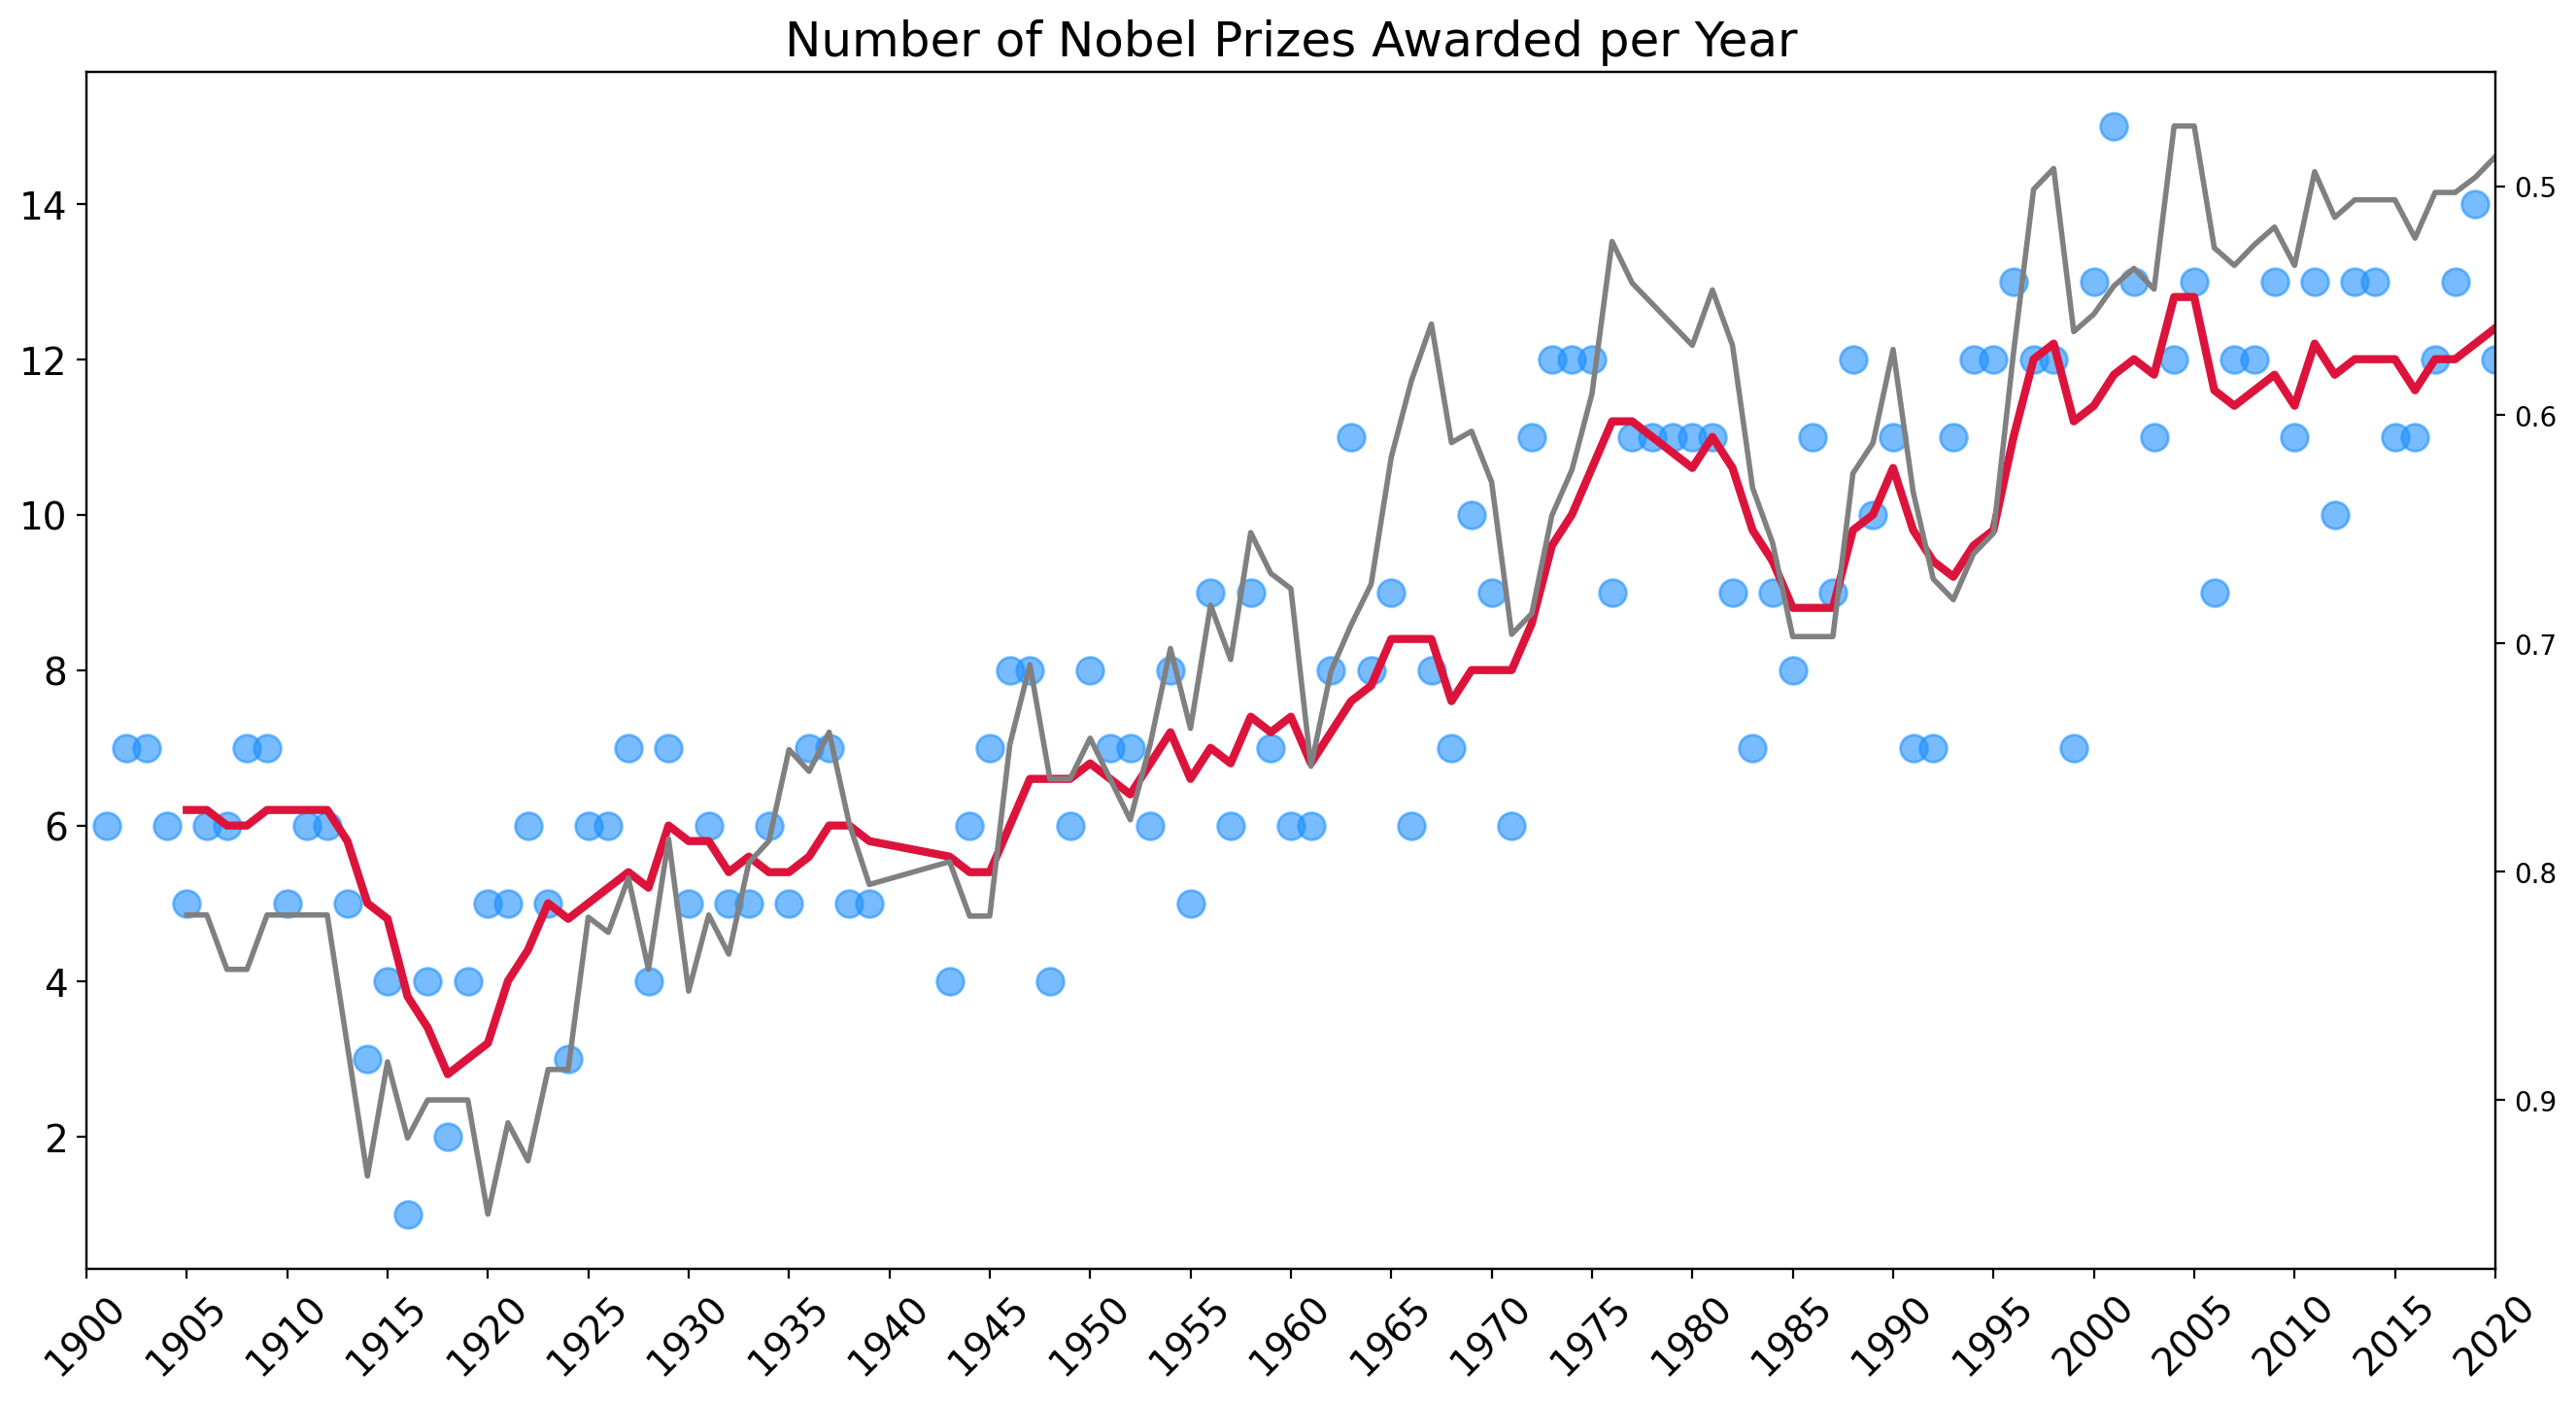

In [40]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax = plt.gca()
ax2 = ax.twinx()
ax.set_xlim(1900, 2020)

ax2.invert_yaxis()

ax.scatter(x=prizes_per_year.index,
           y=prizes_per_year.values,
           c="dodgerblue",
           alpha=0.6,
           s=100
)

ax.plot(prizes_per_year.index,
        moving_average.values,
        c="crimson",
        lw=3
       )


# Adding prize share plot on second axis
ax2.plot(prizes_per_year.index,
        moving_share_avg.values,
        c="grey",
        lw=2)
plt.show()

In [41]:
df.nsmallest(10, "share_pct")[["share_pct", "category", "year"]]

share_pct   category  year
18        0.25    Physics  1903
19        0.25    Physics  1903
225       0.25  Chemistry  1946
226       0.25  Chemistry  1946
235       0.25   Medicine  1947
236       0.25   Medicine  1947
308       0.25   Medicine  1958
309       0.25   Medicine  1958
351       0.25    Physics  1963
352       0.25    Physics  1963

In [42]:
df.nlargest(10, "share_pct")[["share_pct", "category", "year"]]

share_pct    category  year
0         1.0   Chemistry  1901
1         1.0  Literature  1901
2         1.0    Medicine  1901
5         1.0     Physics  1901
6         1.0   Chemistry  1902
7         1.0  Literature  1902
8         1.0    Medicine  1902
13        1.0   Chemistry  1903
14        1.0  Literature  1903
15        1.0    Medicine  1903

In [43]:
# top 20 countries
top_countries = df.groupby("birth_country_current", as_index=False).agg({"prize": pd.Series.count})

In [44]:
top_countries.sort_values("prize", inplace=True)
top20_countries = top_countries[-20:]
top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

In [45]:
bar = px.bar(x=top20_countries.prize,
             y=top20_countries.birth_country_current,
             orientation="h",
             color=top20_countries.prize,
             color_continuous_scale="Viridis",
             title="Top 20 Countries by Number of Prizes"
)
bar.update_layout(xaxis_title="Number of Prizes",
                 yaxis_title="Country",
                 coloraxis_showscale=False)
bar.show()

In [46]:
# Display Data on a Map
df_countries = df.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize": pd.Series.count})
df_countries.sort_values("prize", ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [47]:
world_map = px.choropleth(df_countries,
                         locations="ISO",
                         color="prize",
                         hover_name="birth_country_current",
                         color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

In [48]:
cat_country = df.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})
cat_country.sort_values("prize", ascending=False, inplace=True)
cat_country

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [49]:
df_merged = pd.merge(cat_country, top20_countries, on="birth_country_current")
df_merged.columns = ["birth_country_current", "category", "cat_prize", "total_prize"]

In [50]:
df_merged.sort_values("total_prize", inplace=True)

In [51]:
df_merged

birth_country_current   category  cat_prize  total_prize
109                     India    Physics          1            9
108                     India      Peace          1            9
88                    Belgium      Peace          3            9
89                    Belgium   Medicine          3            9
90                    Belgium  Chemistry          1            9
..                        ...        ...        ...          ...
4    United States of America      Peace         19          281
3    United States of America  Economics         49          281
2    United States of America  Chemistry         55          281
1    United States of America    Physics         70          281
0    United States of America   Medicine         78          281

[110 rows x 4 columns]

In [52]:
bar = px.bar(x=df_merged.cat_prize,
            y=df_merged.birth_country_current,
            color=df_merged.category,
            orientation="h",
            title="Top 20 Countries by Number of Prizes and Category")
bar.update_layout(xaxis_title="Number of Prizes",
                 yaxis_title="Country")
bar.show()

In [55]:
top20_orgs = df.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [56]:
bar = px.bar(x=top20_orgs.values,
            y=top20_orgs.index,
            orientation="h",
            color=top20_orgs.values,
            color_continuous_scale=px.colors.sequential.haline,
            title="Top 20 Research Institutions by Number of Prizes")
bar.update_layout(xaxis_title="Number of Prizes",
                 yaxis_title="Institution")
bar.show()

In [58]:
top20_cities = df.organization_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)

In [59]:
bar = px.bar(x=top20_cities.values,
            y=top20_cities.index,
            orientation="h",
            color=top20_cities.values,
            color_continuous_scale=px.colors.sequential.Plasma,
            title="Which City do the Most Research?")
bar.update_layout(xaxis_title="Number of Prizes",
                 yaxis_title="City",
                 coloraxis_showscale=False)
bar.show()

In [60]:
top20_birth_cities = df.birth_city.value_counts()[:20]
top20_birth_cities.sort_values(ascending=True, inplace=True)

In [61]:
bar = px.bar(x=top20_birth_cities.values,
            y=top20_birth_cities.index,
            orientation="h",
            color=top20_birth_cities.values,
            color_continuous_scale=px.colors.sequential.Plasma,
            title="Where were the Noble Laureates Born?")
bar.update_layout(xaxis_title="Number of Prizes",
                 yaxis_title="City of Birth")
bar.show()

In [65]:
country_city_org = df.groupby(["organization_country", "organization_city", "organization_name"], as_index=False).agg({"prize": pd.Series.count})
country_city_org.sort_values("prize", ascending=False, inplace=True)

In [66]:
burst = px.sunburst(country_city_org,
                   path=["organization_country", "organization_city", "organization_name"],
                   values="prize",
                   title="Where do Discoveries Take Place?")
burst.update_layout(xaxis_title="Number of Prizes",
                   yaxis_title="City",
                   coloraxis_showscale=False)
burst.show()

In [67]:
birth_years = df.birth_date.dt.year
df["winning_age"] = df.year - birth_years

In [72]:
display(df.nlargest(1, "winning_age"))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU   0.333333         97.0

In [73]:
df.nsmallest(1, "winning_age")

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK        0.5         17.0

In [74]:
df.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

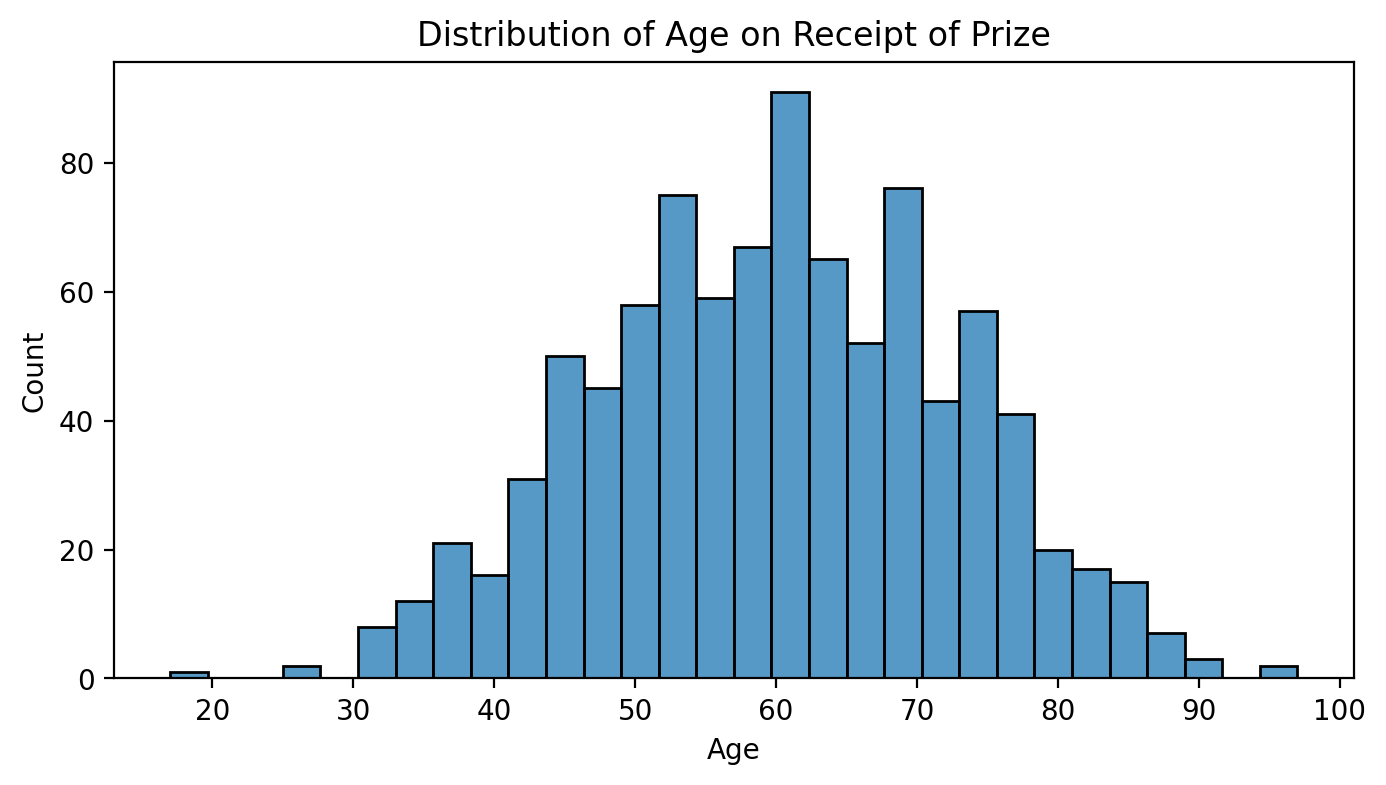

In [79]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(df, x=df.winning_age, bins=30)
plt.xlabel("Age")
plt.title("Distribution of Age on Receipt of Prize");

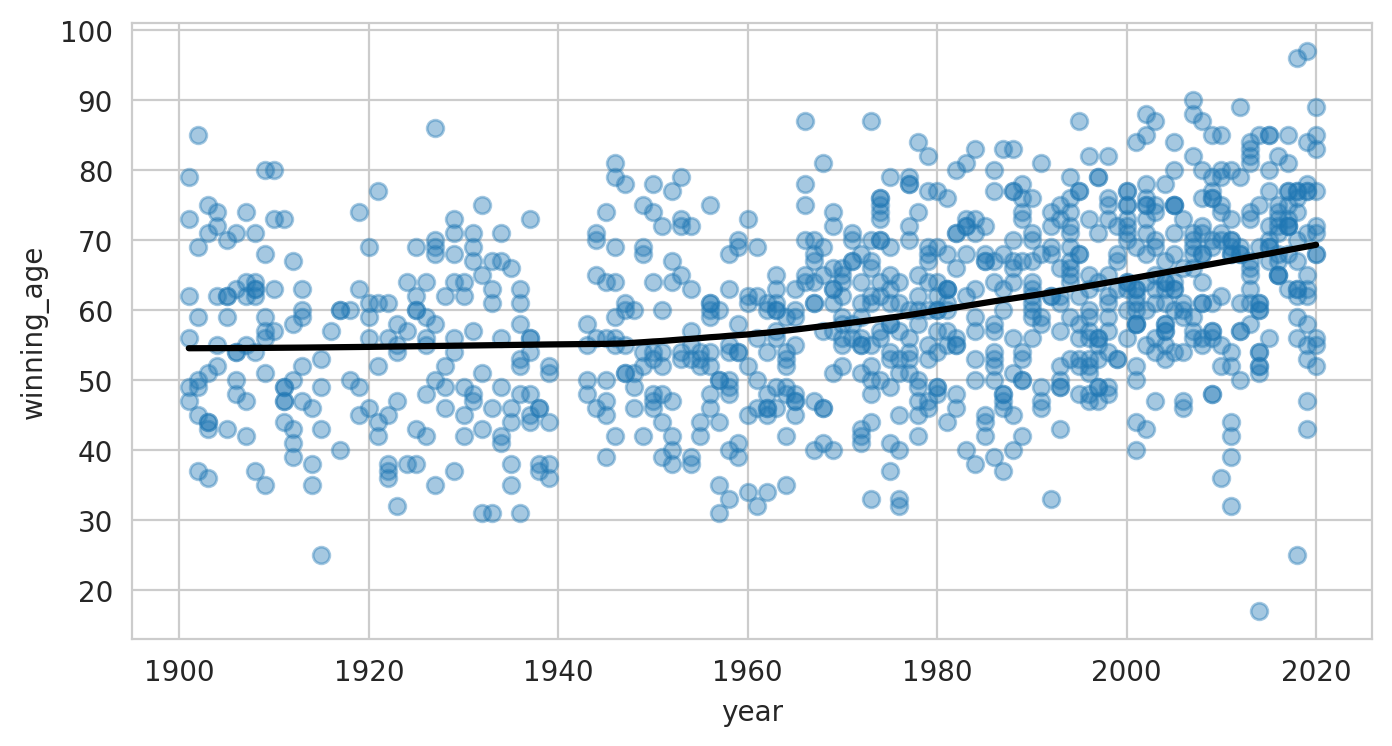

In [80]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(df, x="year", y="winning_age", lowess=True, scatter_kws={"alpha": 0.4}, line_kws={"color": "black"});

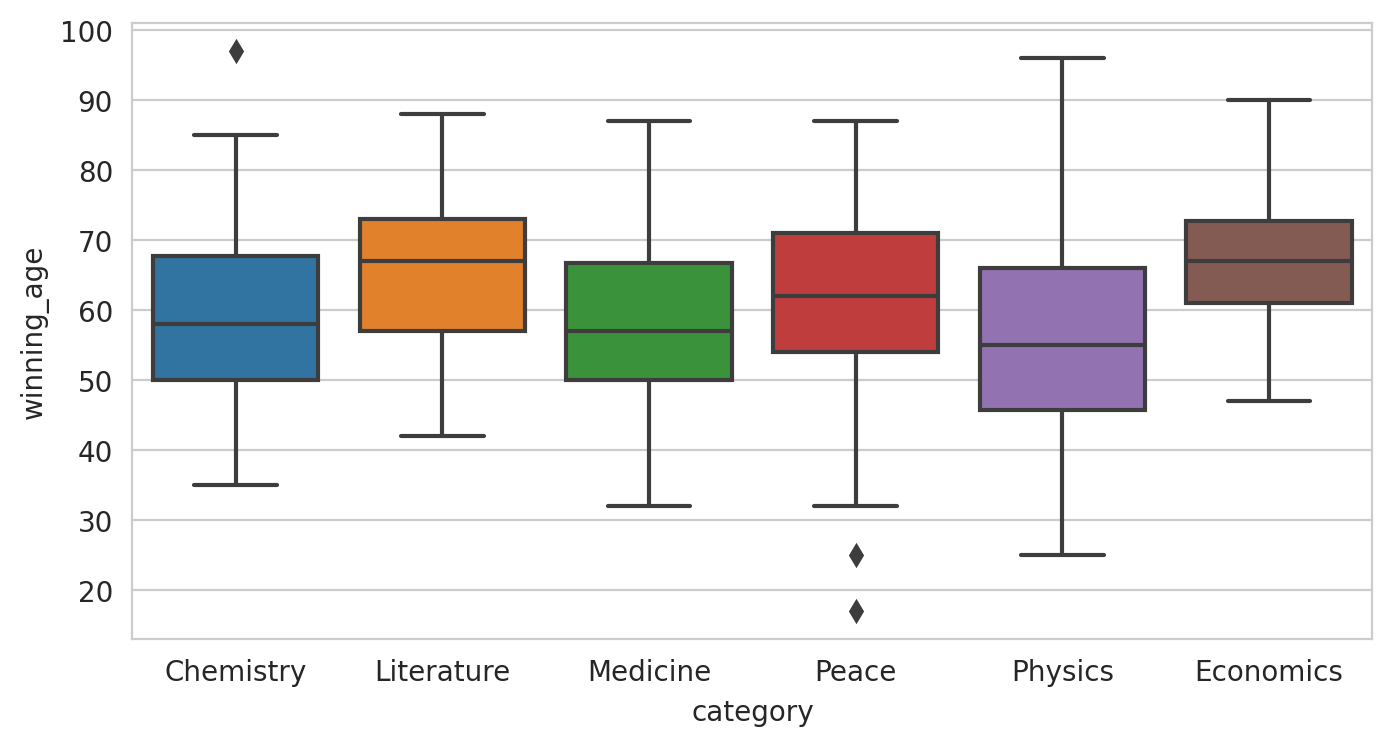

In [82]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(df, x="category", y="winning_age");

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



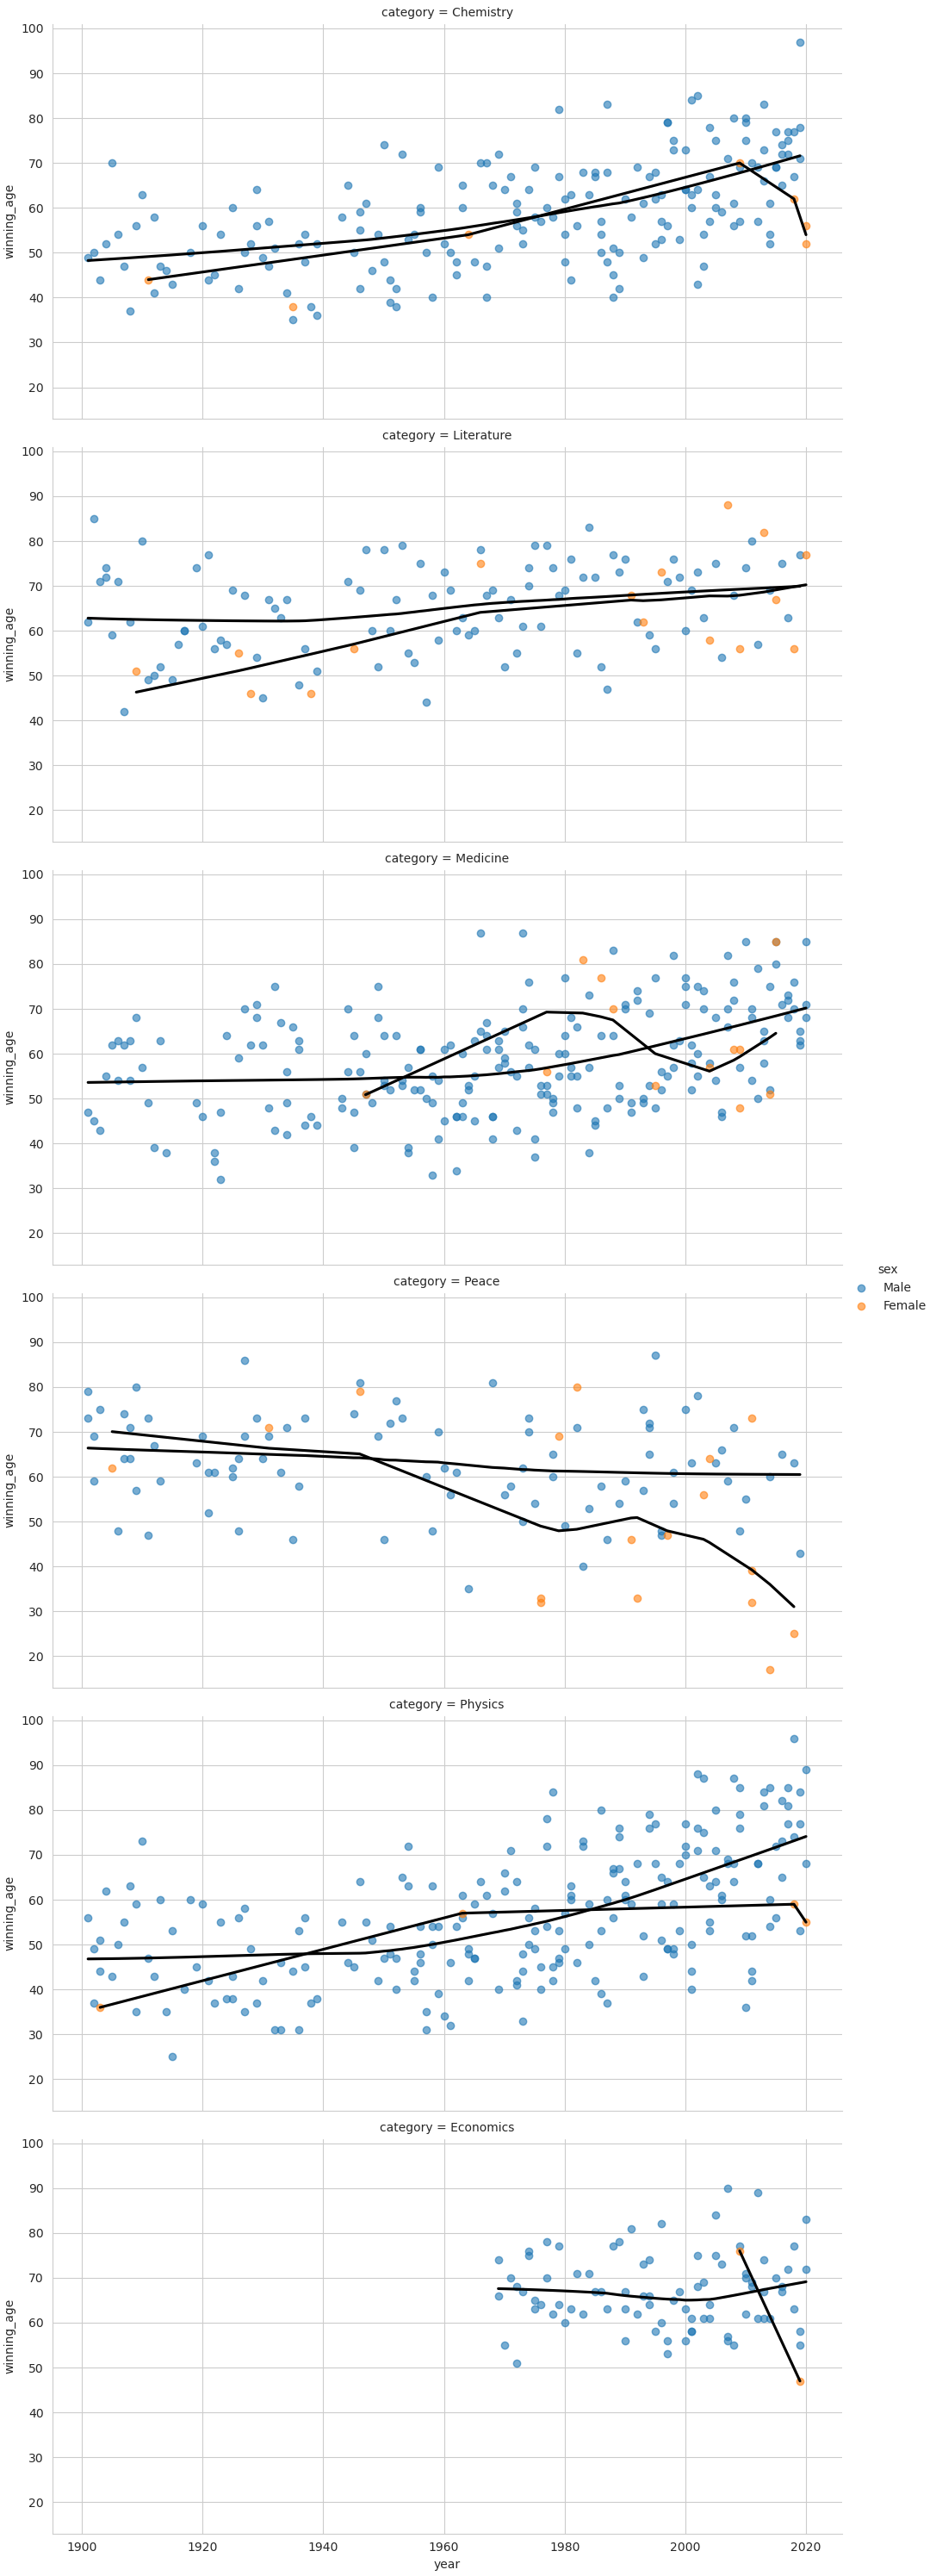

In [89]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df, x="year", y="winning_age", row="category", hue="sex", lowess=True, aspect=2, scatter_kws={"alpha":0.6}, line_kws={"color": "black"})

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



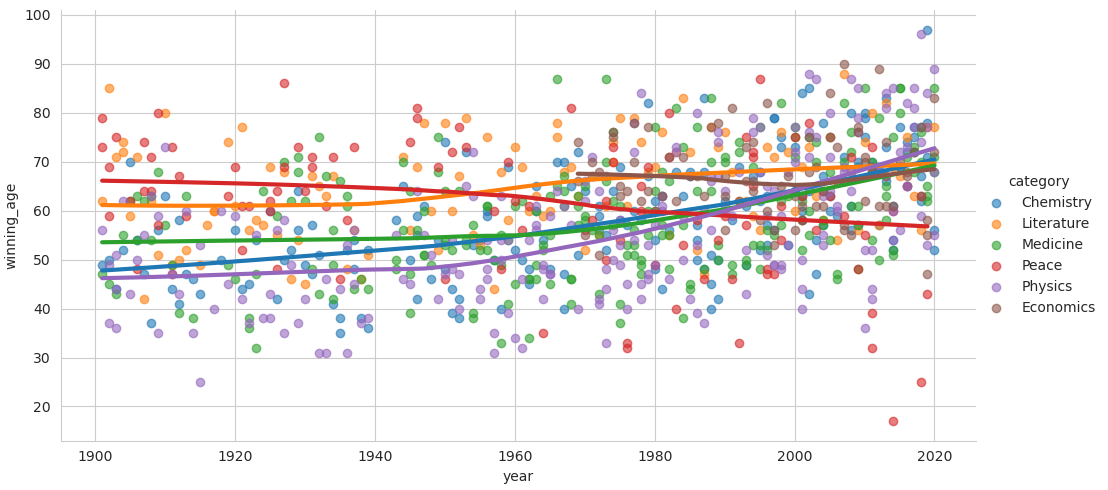

In [91]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df, x="year", y="winning_age", hue="category", lowess=True, aspect=2, scatter_kws={"alpha":0.6}, line_kws={"linewidth": 3})